# **Predicting Customer Churn in a Telecom Company**

## **Problem description:**

A telecom company is facing a high customer churn rate and wants to reduce it.
Customer churn refers to the process where a customer stops doing business with a
company. In the telecom industry, customer churn is a major problem as acquiring new
customers is more expensive than retaining existing customers. The company wants to
use machine learning to predict which customers are likely to churn so that they can
take proactive measures to retain them.

## **About Dataset:**

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time the fiscal quarter ended.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Married (Partner): Indicates if the customer is married: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Number of Dependents: Indicates the number of dependents that live with the customer.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Tenure: Indicates the total amount of months that the customer has been with the company.

Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

## Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Importing Dataset

Here we are reading the database using the name "df" in the variable

In [13]:
df = pd.read_excel("/content/train.xlsx")


In [14]:
df.shape

(7043, 21)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [18]:
df = df.drop("customerID",axis=1)

In [19]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: ylabel='Churn'>

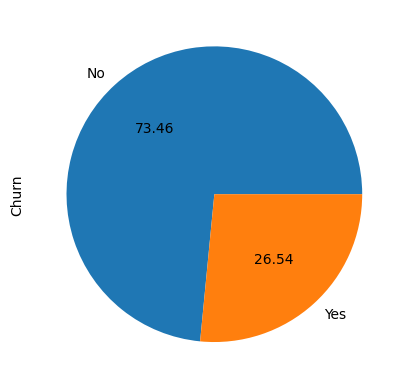

In [24]:
df['Churn'].value_counts().plot(kind="pie",autopct="%0.2f")

In [25]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
idx = df[df["TotalCharges"].isnull()].index

In [98]:
df = df.drop(idx,axis=0).reset_index()


In [28]:
df.duplicated().sum()

0

In [29]:
df

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [30]:
df.columns

Index(['index', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
col = df.columns[df.dtypes=="object"]

In [32]:
for i in col:
    un = df[i].unique()
    print("{} || {}".format(i,un))

gender || ['Female' 'Male']
Partner || ['Yes' 'No']
Dependents || ['No' 'Yes']
PhoneService || ['No' 'Yes']
MultipleLines || ['No phone service' 'No' 'Yes']
InternetService || ['DSL' 'Fiber optic' 'No']
OnlineSecurity || ['No' 'Yes' 'No internet service']
OnlineBackup || ['Yes' 'No' 'No internet service']
DeviceProtection || ['No' 'Yes' 'No internet service']
TechSupport || ['No' 'Yes' 'No internet service']
StreamingTV || ['No' 'Yes' 'No internet service']
StreamingMovies || ['No' 'Yes' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn || ['No' 'Yes']


In [33]:
for i in col:
    un = df[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 Male      3549
Female    3483
Name: gender, dtype: int64 


Partner 
 No     3639
Yes    3393
Name: Partner, dtype: int64 


Dependents 
 No     4933
Yes    2099
Name: Dependents, dtype: int64 


PhoneService 
 Yes    6352
No      680
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


InternetService 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 


TechSupport 
 No                     3472
Yes             

In [34]:
col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [99]:
df = df.drop("index",axis=1)

<Axes: xlabel='MultipleLines', ylabel='count'>

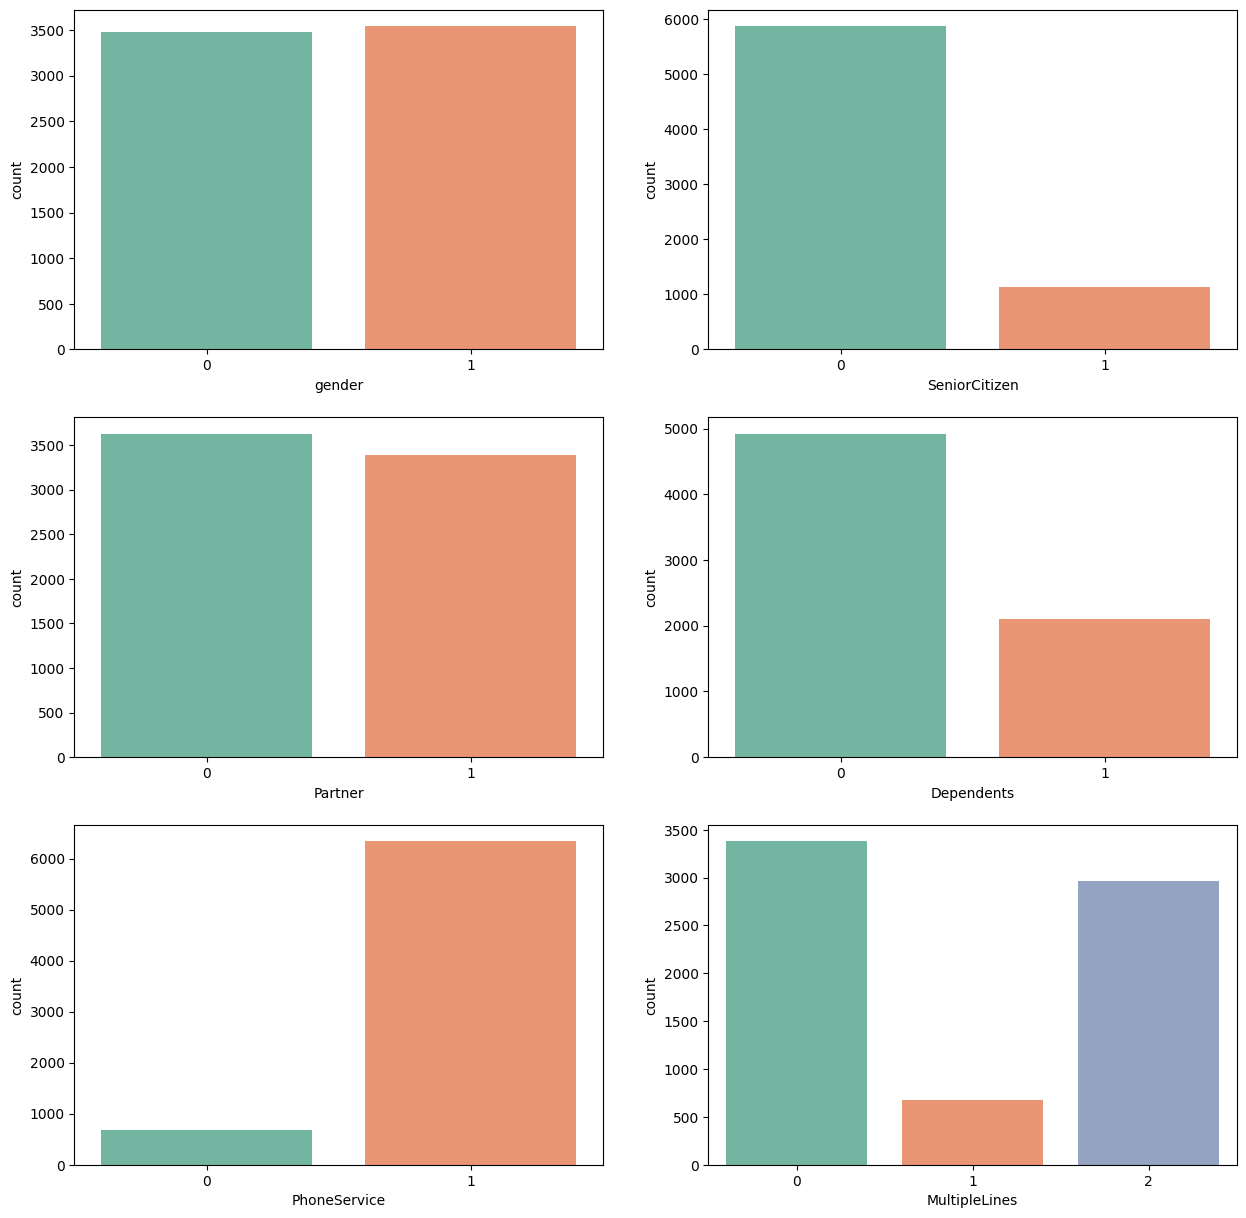

In [100]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', palette = 'Set2', data = df)



<Axes: xlabel='StreamingTV', ylabel='count'>

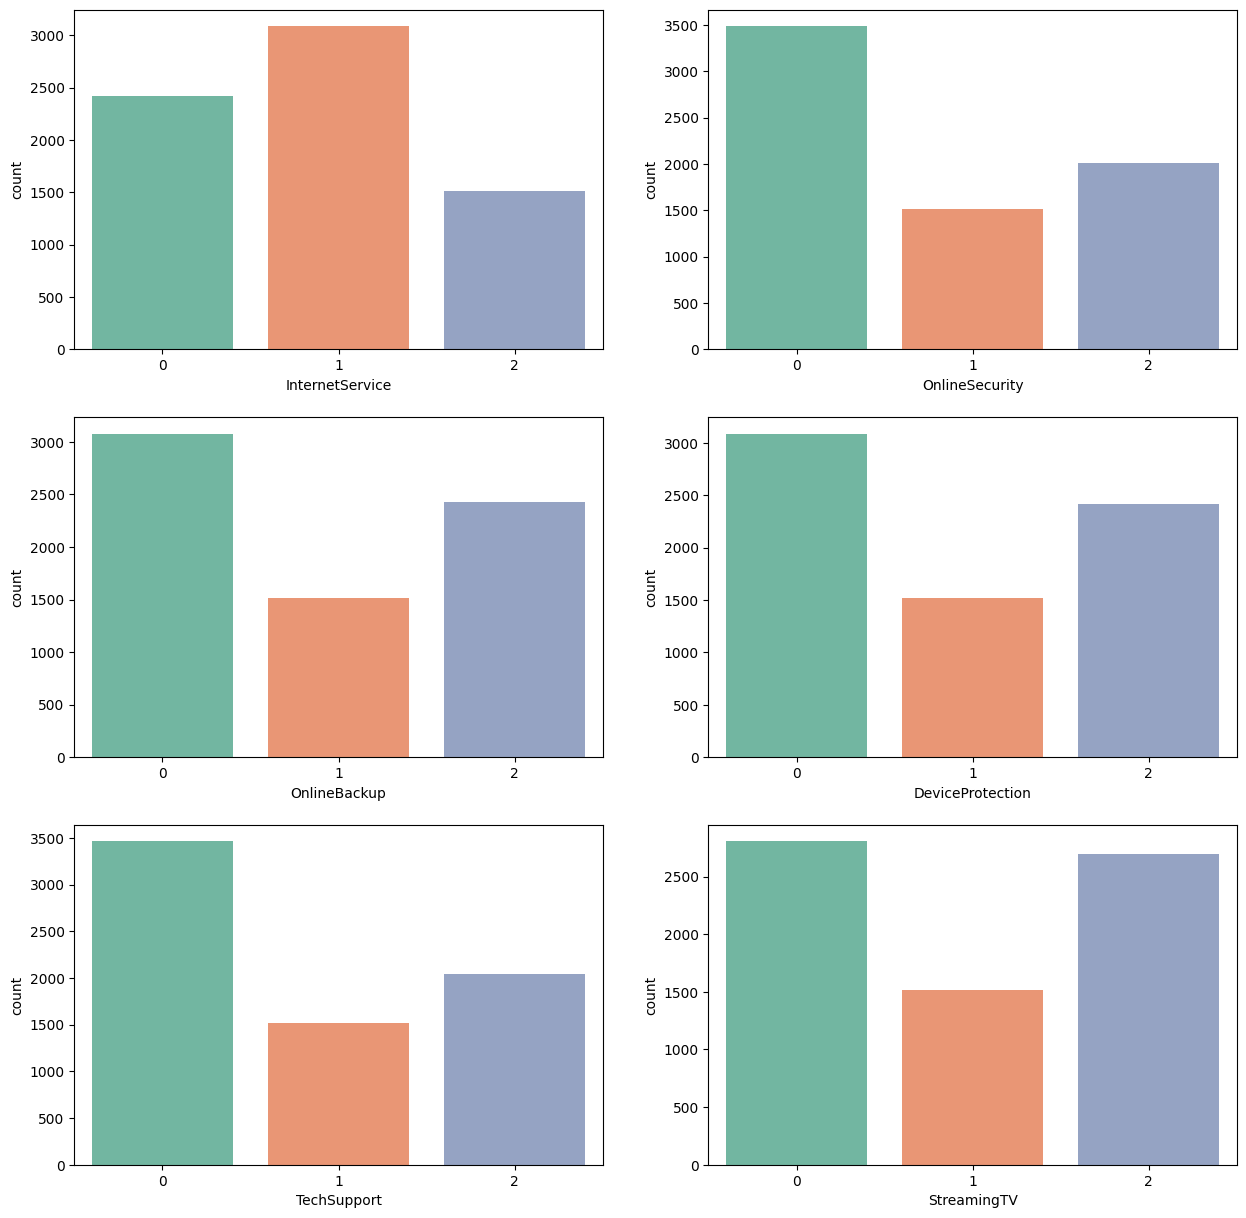

In [101]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', palette = 'Set2', data = df)

<Axes: xlabel='Churn', ylabel='count'>

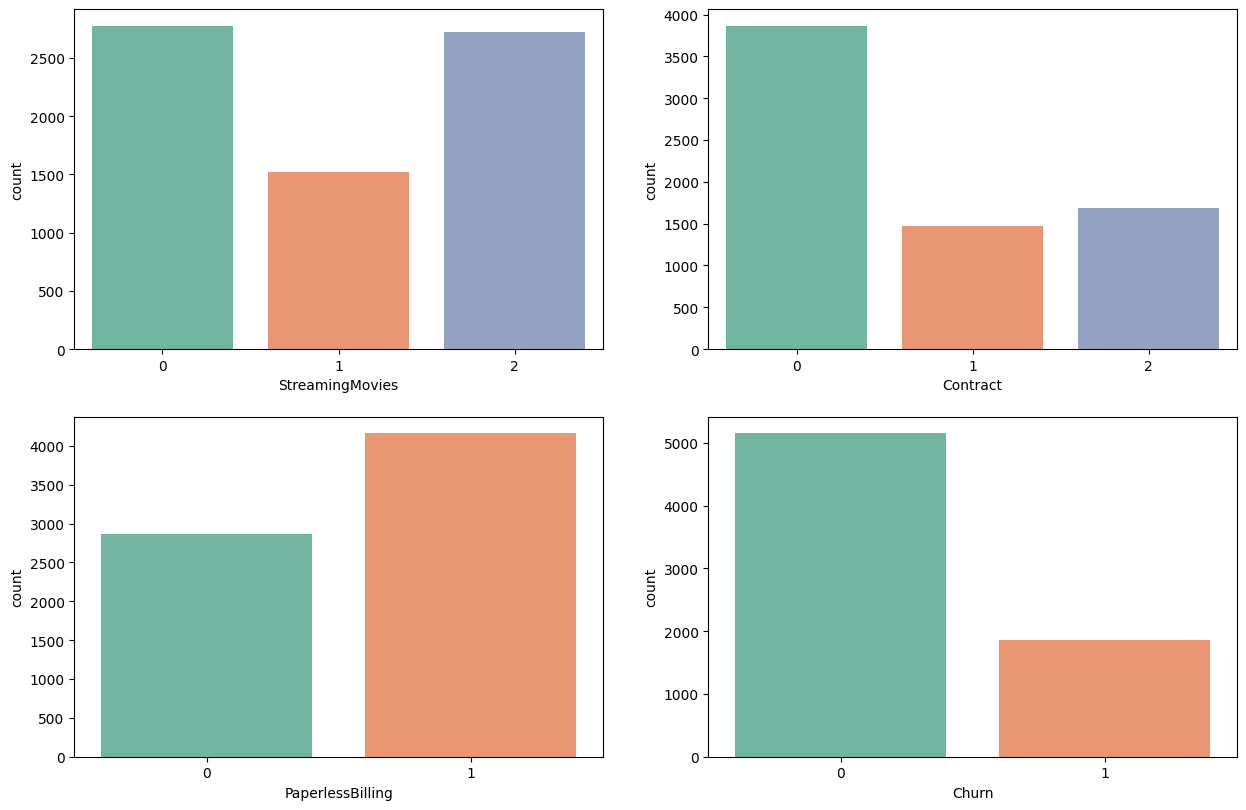

In [102]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set2', data = df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

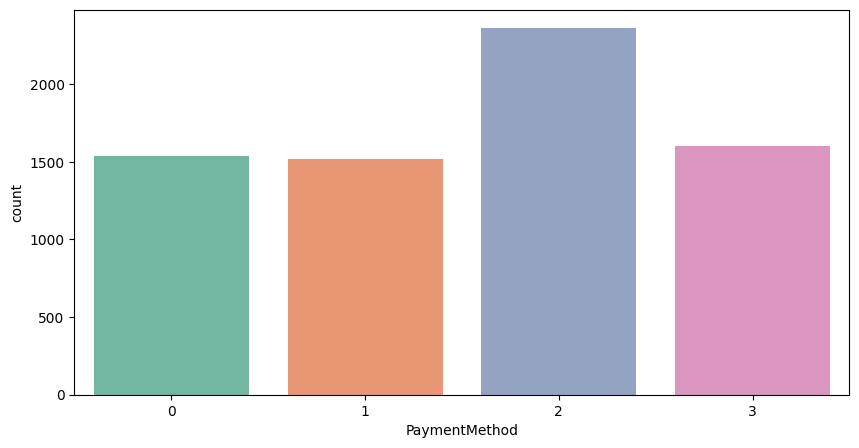

In [103]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', palette = 'Set2', data = df)

<Axes: >

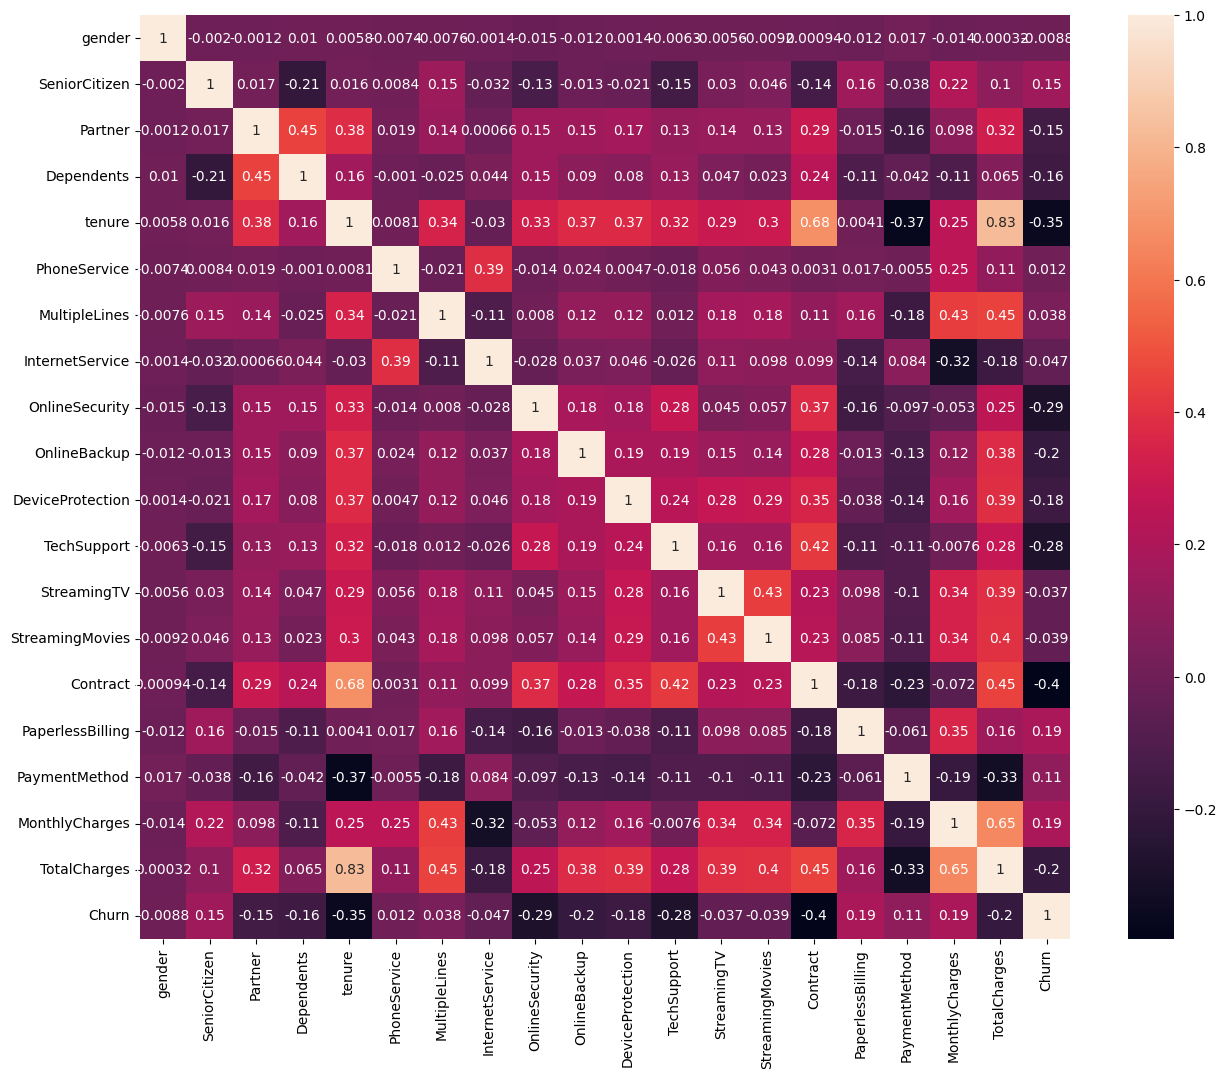

In [104]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [105]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

<Axes: xlabel='Churn', ylabel='count'>

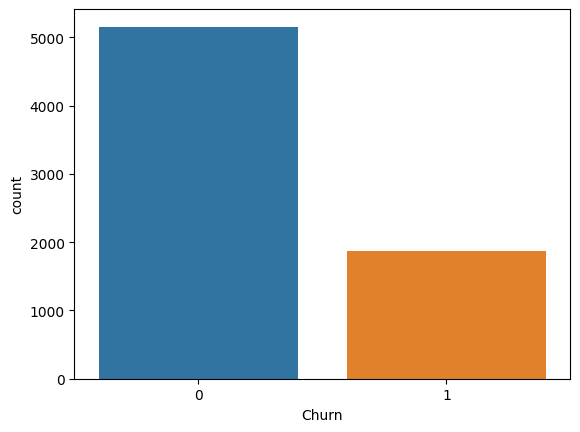

In [106]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=df)

In [107]:
from imblearn.over_sampling import RandomOverSampler

In [108]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

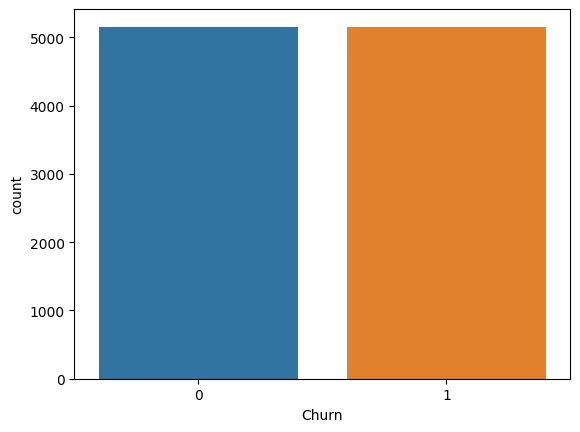

In [109]:

ax = sns.countplot(x=y)

In [110]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000
mean,0.499806,0.195985,0.444434,0.258340,27.828840,0.905450,0.958980,0.856963,0.658553,0.813130,0.816040,0.668832,0.962665,0.971974,0.514934,0.642164,1.631594,67.813732,2043.964871
std,0.500024,0.396976,0.496927,0.437743,24.039781,0.292607,0.950713,0.676440,0.846173,0.893131,0.893734,0.850249,0.911708,0.912042,0.770649,0.479387,1.019898,28.777566,2180.562926
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.550000,270.800000
50%,0.000000,0.000000,0.000000,0.000000,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.600000,1160.600000
75%,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.600000,3273.837500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


In [111]:
df1=pd.read_excel('test.xlsx')

In [112]:
df1.shape

(20, 19)

In [113]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [114]:
col1 = df1.columns[df1.dtypes=="object"]

In [115]:
for i in col1:
    un = df1[i].unique()
    print("{} || {}".format(i,un))

gender || ['Male' 'Female']
Partner || ['No' 'Yes']
Dependents || ['No' 'Yes']
PhoneService || ['Yes' 'No']
MultipleLines || ['No' 'No phone service' 'Yes']
InternetService || ['Fiber optic' 'DSL' 'No']
OnlineSecurity || ['Yes' 'No' 'No internet service']
OnlineBackup || ['no' 'Yes' 'No' 'No internet service']
DeviceProtection || ['yes' 'No' 'Yes' 'No internet service']
TechSupport || ['Yes' 'No' 'No internet service']
StreamingTV || ['Yes' 'No' 'No internet service']
StreamingMovies || ['Yes' 'No' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [116]:
for i in col1:
    un = df[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 1    3545
0    3476
Name: gender, dtype: int64 


Partner 
 0    3630
1    3391
Name: Partner, dtype: int64 


Dependents 
 0    4925
1    2096
Name: Dependents, dtype: int64 


PhoneService 
 1    6341
0     680
Name: PhoneService, dtype: int64 


MultipleLines 
 0    3381
2    2960
1     680
Name: MultipleLines, dtype: int64 


InternetService 
 1    3089
0    2415
2    1517
Name: InternetService, dtype: int64 


OnlineSecurity 
 0    3489
2    2015
1    1517
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 0    3080
2    2424
1    1517
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 0    3090
2    2414
1    1517
Name: DeviceProtection, dtype: int64 


TechSupport 
 0    3465
2    2039
1    1517
Name: TechSupport, dtype: int64 


StreamingTV 
 0    2807
2    2697
1    1517
Name: StreamingTV, dtype: int64 


StreamingMovies 
 0    2778
2    2726
1    1517
Name: StreamingMovies, dtype: int64 


Contract 
 0    3868
2    1682
1    1471
Name: Contract, dtype: int64 



In [117]:
col1

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [118]:
for i in col1:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [119]:
df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.75,random_state=0)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [158]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [159]:
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.8537626066718387

In [160]:
confusion_matrix(y_test,y_pred)

array([[ 953,  296],
       [  81, 1248]])

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1249
           1       0.81      0.94      0.87      1329

    accuracy                           0.85      2578
   macro avg       0.86      0.85      0.85      2578
weighted avg       0.86      0.85      0.85      2578



In [123]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
y_pred = model1.predict(X_test)

In [125]:
accuracy_score(y_test,y_pred)

0.8824670287044221

In [126]:
import pickle
pickle_out = open("mdl.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()

In [127]:
import warnings
warnings.filterwarnings("ignore")
y_pred0=model1.predict(df1)

In [128]:
y_pred0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
confusion_matrix(y_test,y_pred)

array([[1027,  222],
       [  81, 1248]])

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1249
           1       0.85      0.94      0.89      1329

    accuracy                           0.88      2578
   macro avg       0.89      0.88      0.88      2578
weighted avg       0.89      0.88      0.88      2578



In [131]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7668735453840186

In [133]:
confusion_matrix(y_test,y_pred)

array([[ 898,  351],
       [ 250, 1079]])

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1249
           1       0.75      0.81      0.78      1329

    accuracy                           0.77      2578
   macro avg       0.77      0.77      0.77      2578
weighted avg       0.77      0.77      0.77      2578



In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = naive_bayes.predict(X_test)
accuracy_score(y_test,y_pred)

0.7536850271528317

In [156]:
confusion_matrix(y_test,y_pred)

array([[ 881,  368],
       [ 267, 1062]])

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1249
           1       0.74      0.80      0.77      1329

    accuracy                           0.75      2578
   macro avg       0.76      0.75      0.75      2578
weighted avg       0.75      0.75      0.75      2578



In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
model1 = LogisticRegression()

results = cross_val_score(model1, x,y, cv=kfold)
results.min(),results.max()

(0.7206595538312318, 0.7769156159068865)

In [136]:
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier


kfold = KFold(n_splits=10)
model2 = RandomForestClassifier()

results = cross_val_score(model2, x,y, cv=kfold)

print("Average Accuracy",results.mean())

Average Accuracy 0.906815746734938


In [137]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [162]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('XGboost',XGBClassifier()))

In [163]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.745347 (0.019477)
KNN: 0.743803 (0.073044)
RF: 0.907495 (0.061995)
SVM: 0.757470 (0.023873)
XGboost: 0.850956 (0.054047)


Hyperparameter Tuning

In [140]:
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model2 = RandomForestClassifier(criterion="entropy")

results = cross_val_score(model2, x,y, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())
print(results.min(),results.max())

Average Accuracy 0.9054584996879675
SD  0.06264670036956121
0.8419010669253152 0.9990300678952473


In [164]:
from sklearn.model_selection import GridSearchCV
model2 = RandomForestClassifier()
kfold = KFold(n_splits=10)
param = {"n_estimators":[50,100,200,150],"max_depth":[6,8,12]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(x,y)

In [166]:
grid_result.best_score_

0.8752993443559726

In [167]:
grid_result.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [168]:
model2 = RandomForestClassifier(max_depth=8)
kfold = KFold(n_splits=10)
param = {"n_estimators":[20,30,50,100]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(x,y)


In [169]:
grid_result.best_score_


0.7889871352416183

In [170]:

grid_result.best_params_

{'n_estimators': 50}

In [171]:
import pickle
pickle_out = open("classifier3.pkl","wb")
pickle.dump(kn, pickle_out)
pickle_out.close()

NameError: ignored